### 3. Mean Shift(평균 이동)
- "군집 기준: 중심점=군집의 밀도가 높은 곳"
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 지점을 중심점으로 설정 (여기서 확률밀도함수를 찾는 데 KDE(Kernel Density Estimation)를 이용)
- k-means와는 달리, 가장 최적의 k는 알고리즘 자체에서 정해주지만 대신 '대역폭(bandwidth)'을 초기에 정해야 함. 또한 이 대역폭에 따라 군집화가 매우 많은 영향을 받는다는 단점.
- 그러나 데이터 세트 형태, 분포를 가정하지 않는 비모수적 방법이며, 이상치의 영향력도 크지 않음. 또 k를 정해주지 않아도 자기가 알아서 확률 밀도가 큰 곳에 군집을 만들기 때문에 쉽다!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
%matplotlib inline
sns.set(color_codes=True) #참고)만일 sns.set을 설정하면 plt든 sns든 seaborn의 그래프형태로 깔끔하게 나옴.(plt형태가 좋으면 안해도됨.)

In [2]:
#make_blobs를 이용하여 가상의 데이터 만들기
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) #X피처 2개, 중심점 3개

#### MeanShift(bandwidth=대역폭)
- 대역폭을 작게 할수록 군집 개수가 많아짐.
- 군집 개수로 찾아준 게 너무 많다면 대역폭을 늘리기

In [3]:
#객체
meanshift = MeanShift(bandwidth=0.9) #우리는 대역폭만 설정하면, 밀도가 가장 높은 곳을 찾아서 최적의 클러스터 개수인 k는 알아서 찾아줌.
#학습
cluster_labels = meanshift.fit_predict(X)
#결과에서 cluster의 유니크값은?
np.unique(cluster_labels) #k=8로 찾아주었음. 헐.. 앞에서 make_blobs로 만들었을 때 최적의 중심점 개수는 3개였는데..? 지나치게 세분화된 군집화임.

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [4]:
#대역폭을 0.9->1.0으로 늘려서 다시 수행
#객체
meanshift = MeanShift(bandwidth=1) #우리는 대역폭만 설정하면, 밀도가 가장 높은 곳을 찾아서 최적의 클러스터 개수인 k는 알아서 찾아줌.
#학습
cluster_labels = meanshift.fit_predict(X)
#결과에서 cluster의 유니크값은?
np.unique(cluster_labels)

array([0, 1, 2], dtype=int64)

##### estimate_bandwidth(X, quantile)
- 최적의 대역폭 값을 찾아줌

In [5]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.25)
#최적의 bandwidth값 출력
np.round(bandwidth,3) 

1.689

In [6]:
#위에 나온 값을 이용해 시각화

df = pd.DataFrame(X, columns= ['ftr1','ftr2'])
df['target']=y
df.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


In [7]:
#최적의 대역폭 값
best_bandwidth = estimate_bandwidth(X, quantile=0.25)
#평균이동 수행
#객체
meanshift = MeanShift(bandwidth=best_bandwidth)
#학습
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2], dtype=int64)

- 속성

In [9]:
#fit_predict 하지 않고, 그냥 fit을 학습만 한 후 labels_속성을 이용해 레이블 값을 뽑아낼 수 있음
meanshift.labels_

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2], dtype=int64)

In [10]:
meanshift.cluster_centers_ #row: cluster, col:X ftr #중심점 좌표

array([[ 0.90425412,  4.43969979],
       [-1.63547329,  2.84588284],
       [ 1.84011231,  0.83840976]])

In [8]:
df['meanshift']=cluster_labels
df.head()

,ftr1,ftr2,target,meanshift
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


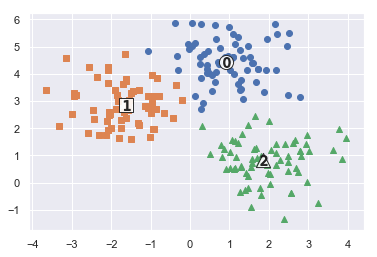

In [9]:
#시각화(meanshift.cluster_centers_ 이용)(k-means 코드와 동일)
centers = meanshift.cluster_centers_ #중심점의 좌표 지정->시각화 그래프를 만든 후 중심점에 점을 찍기 위함.
unique_labels = np.unique(cluster_labels) #0,1,2
markers=['o','s','^']

for i in unique_labels:
    #시각화 그래프
    label_cluster = df[df['meanshift']==i] #i에 따른 cluster 집합 만듦(불린인덱싱이므로 그 행번호의 df반환)
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], marker= markers[i])
    
    #중심점 점 찍기
    center_x_y = centers[i] #클러스터 0,1,2를 지정
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, c='white', alpha=0.9, edgecolor='k', marker=markers[i]) #도형모양의 흰색 점
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=100, c='k', alpha=0.9, edgecolor='k', marker='$%d$' % i) #점 안에 써질 label
    # 이렇게 해도 결과 동일
   # plt.scatter(x=centers[i,0], y=centers[i,1], s=200, c='white', alpha=0.9, edgecolor='k', marker=markers[i])
   # plt.scatter(x=centers[i,0], y=centers[i,1], s=100, c='k', alpha=0.9, edgecolor='k', marker='$%d$' % i)
    
plt.show()


In [10]:
df.head()

,ftr1,ftr2,target,meanshift
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


In [11]:
#target값과 meanshift한 cluster값 비교-groupby
df.groupby(by=['target','meanshift']).count()

ftr1  ftr2
target meanshift            
0      0            67    67
1      2            67    67
2      1            65    65
       2             1     1

In [12]:
#혹은 value_counts 이용해도 된다!
df.groupby('target')['meanshift'].value_counts() #결과를 보면 원본데이터인 target과 많이 일치하는 걸로 보아 잘 군집화됐음을 알수있음.

target  meanshift
0       0            67
1       2            67
2       1            65
        2             1
Name: meanshift, dtype: int64

#### 참고: 평균이동이 사용하는 KDE는 bandwidth에 따라 그 확률밀도함수의 모양이 바뀜
- seaborn의 distplot()을 이용하여 KDE 시각화
https://seaborn.pydata.org/tutorial/distributions.html
- 저자) https://github.com/chulminkw/PerfectGuide/blob/master/7%EC%9E%A5/7-3%20Mean_Shift.ipynb
- KDE와 확률밀도함수가 잘 이해가 안된다면 참고: https://darkpgmr.tistory.com/147

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


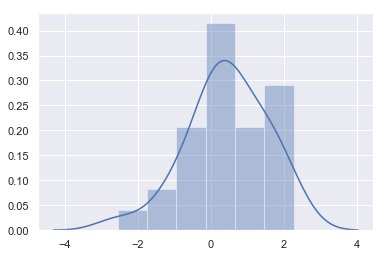

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x);

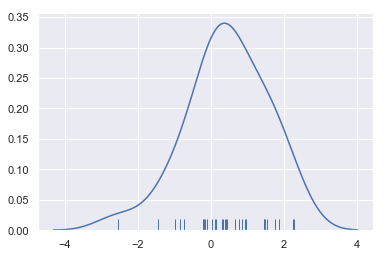

In [14]:
sns.distplot(x, hist=False, rug=True);

- seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음

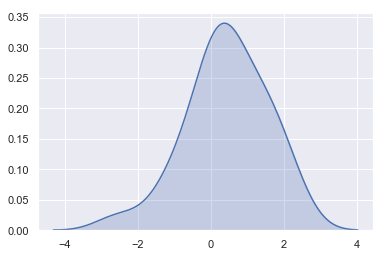

In [15]:
sns.kdeplot(x, shade=True);

##### bandwidth에 따른 KDE 변화
- 밑의 그래프를 참고하면 bw가 0.2일 때는 그래프가 들쭉날쭉(빨강)한데, bw가 2일 때는 그냥 완만하다(녹색). 
- 즉, 이렇게 KDE의 모양이 바뀌므로(또 평균이동은 KDE의 피크 부분을 밀도가 가장 높은 곳으로 생각하니까) bw가 작을수록 k의 수가 많아지는 것임.

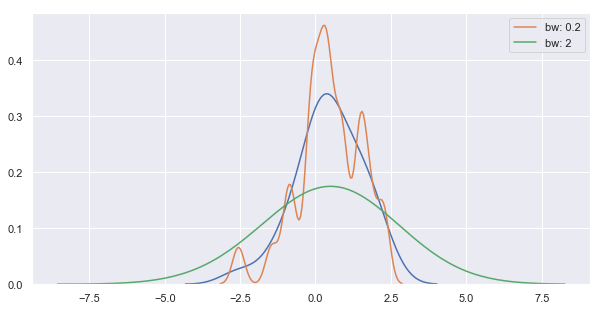

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

### 4. GMM(Gaussian Mixture Model)
- "군집 기준: 데이터가 여러개의 가우시안 분포모델 중 하나에 속해 있음을 가정"
- 여러 개의 가우시안 분포(=정규분포)가 섞여 있는 모델이라는 의미.
- 여기서의 모수 추정은 2가지를 하는데, <1.개별 정규 분포들의 평균과 분산 / 2.개별 데이터가 어떤 정규 분포에 속하는지의 확률>을 계산한다.
- 처음에 'n_components'(가우시안 분포모델 개수) 설정하는 게 중요

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#iris 데이터 가져오기
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### GaussianMixture(n_components, random_state) : n_components는 가우시안 분포를 몇개로 할건지?

In [6]:
#GMM 수행
#객체, 학습
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
#결과
gmm_cluster = gmm.predict(iris.data) #gmm에서는 레이블 출력 시 gmm.labels_ 이 속성을 이용할 수 없음.

iris_df['gmm_cluster'] = gmm_cluster
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [7]:
#target vs gmm_cluster
iris_df.groupby(by=['target','gmm_cluster']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target gmm_cluster                                                           
0      0                           50                50                 50   
1      1                            5                 5                  5   
       2                           45                45                 45   
2      1                           50                50                 50   

                    petal width (cm)  
target gmm_cluster                    
0      0                          50  
1      1                           5  
       2                          45  
2      1                          50

In [8]:
iris_df.groupby(by='target')['gmm_cluster'].value_counts() #수행 결과, 5개가 제대로 군집화되진 않았지만 꽤 좋은 성능

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

In [10]:
#kmeans 수행 시?
#객체,학습
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
#결과
kmeans_cluster = kmeans.predict(iris.data)

iris_df['kmeans']=kmeans_cluster
iris_df.groupby(by=['target'])['kmeans'].value_counts() #결과는 GMM으로 수행했을 때가 더 좋음.

target  kmeans
0       1         50
1       0         48
        2          2
2       2         36
        0         14
Name: kmeans, dtype: int64

- GMM이 kmeans보다 더 뛰어난 알고리즘이다 뭐 이런 말이 아니라, "해당 데이터 세트(iris)가 GMM에 더 효과적이다"가 맞는 말!
- 다음은 앞으로 시각화를 많이 수행할 예정이므로 시각화하는 함수를 제작

In [11]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter : #iscenter는 중심점 좌표를 객체에서 속성으로 제공하는지?(만일 False라면 중심점을 표시하지 않음)
        centers = clusterobj.cluster_centers_
        
    ###################################################################이전의 시각화 코드와 매우 동일
    unique_labels = np.unique(dataframe[label_name].values) #레이블의 유니크한 값
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels: 
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1: #만일 레이블의 유니크값에 -1이 있다면 노이즈가 있는 것. --->dbscan에서 사용!
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label) #보통은 이경우. 클러스터링을 한 후에 legend에 '클러스터 #번'이라고 입력해주는 것임.
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter: #중심점 좌표를 제공한다면 중심점 좌표를 찍음.
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    ######################################################################
            
    if isNoise: #만일 노이즈 값이 있다면 legend의 위치를 위의 중심에 놓고
        legend_loc='upper center'
    else: legend_loc='upper right' #노이즈값이 없는 보통의 경우라면 위의 오른쪽에 둔다.
    
    plt.legend(loc=legend_loc) #legend 설정
    plt.show()

In [20]:
#make_blobs로 가상의 데이터를 생성한 후 시각화
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0) #std이 0.5로 군집이 뭉쳐서 만들어짐.

#길게 늘어선 타원형의 데이터 세트를 생성하기 위해 위의 X, y 값을 좀 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]] #1차원의 리스트, 스칼라로 생각
X_aniso = np.dot(X, transformation) #X데이터셋에 위의 숫자를 곱함(300x2)*(2,) =(300x2), 이제 X_aniso를 피처로 이용할 것임

#우리가 생성하고 시각화 함수에 넣을 df는 'cluster_df'
cluster_df = pd.DataFrame(X_aniso, columns=['ftr1','ftr2'])
cluster_df['target']=y
cluster_df.head()

,ftr1,ftr2,target
0,-1.671828,3.814284,0
1,0.945385,-0.901944,1
2,-0.959199,2.857152,0
3,-2.187799,3.569903,2
4,-1.967100,3.067528,2


In [21]:
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0) 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
print(len(transformation)) #리스트이므로 스칼라로 생각
X_aniso = np.dot(X, transformation)
print(X_aniso.shape)

2
(300, 2)


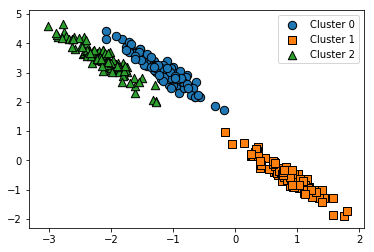

In [22]:
#생성된 df를 위의 시각화 함수에 대입 - 정답 데이터
visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

- 위에서 만들어진 길쭉한 타원형의 데이터 세트에서 kmeans와 GMM을 수행 후, 군집화 결과를 반환
- (참고) kmeans는 원형의 군집화는 잘하지만 타원형은 못함

In [27]:
#kmeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso) #결과 #주의!!아까 X 말고 X_aniso로 바꿨음!!
cluster_df['kmeans']=kmeans_label

cluster_df.head()

,ftr1,ftr2,target,kmeans
0,-1.671828,3.814284,0,0
1,0.945385,-0.901944,1,1
2,-0.959199,2.857152,0,2
3,-2.187799,3.569903,2,0
4,-1.967100,3.067528,2,0


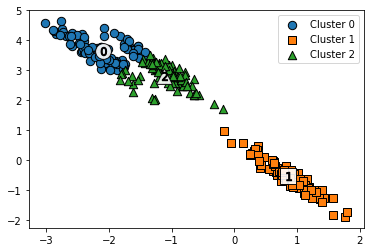

In [28]:
visualize_cluster_plot(kmeans, cluster_df, 'kmeans', iscenter=True) #결과가 bad(정답 데이터와 비교)
                                                                                                        #왜냐면 kmeans는 원형 데이터엔 군집화를 잘하지만 이런 타원형은 잘 하지 못하기 때문

In [29]:
#GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso) #결과 #주의!!아까 X 말고 X_aniso로 바꿨음!!
cluster_df['gmm']=gmm_label

cluster_df.head()

,ftr1,ftr2,target,kmeans,gmm
0,-1.671828,3.814284,0,0,2
1,0.945385,-0.901944,1,1,1
2,-0.959199,2.857152,0,2,2
3,-2.187799,3.569903,2,0,0
4,-1.967100,3.067528,2,0,0


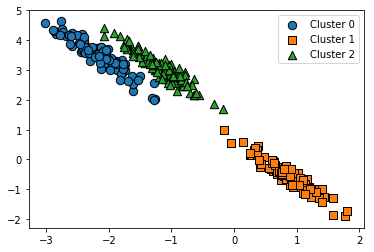

In [30]:
visualize_cluster_plot(gmm, cluster_df, 'gmm', iscenter=False) #결과가 매우 좋음(정답 데이터와 비교)

In [31]:
#시각화 말고 groupby를 이용해 결과를 출력
cluster_df.groupby(by='target')['kmeans'].value_counts()

target  kmeans
0       2          73
        0          27
1       1         100
2       0          86
        2          14
Name: kmeans, dtype: int64

In [32]:
cluster_df.groupby(by='target')['gmm'].value_counts()

target  gmm
0       2      100
1       1      100
2       0      100
Name: gmm, dtype: int64

- 원형의 데이터만 잘 군집화하는 kmeans와는 달리, GMM은 좀 더 유연한 군집화를 보여준다.
- 하지만 GMM은 데이터의 가우시안 분포(정규분포)를 가정하고 있으며 수행 시간이 오래 걸린다는 단점이..